In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [49]:
import numpy as np
import pandas as pd

# Generar los valores de x utilizando np.linspace()
x = np.linspace(0, 10, 50)

# Perfecta correlación positiva
y_perfecta_corr_pos = x

# Alta correlación positiva con ruido aleatorio
y_alta_corr_pos = 2 * x + 1 + np.random.normal(0, 1, 50)

# Baja correlación positiva con ruido aleatorio
y_baja_corr_pos = 0.5 * x + 5 + np.random.normal(0, 1, 50)

# Sin correlación
y_sin_corr = np.random.randint(20, size=50)

# Baja correlación negativa con ruido aleatorio
y_baja_corr_neg = -0.5 * x + 15 + np.random.normal(0, 1, 50)

# Alta correlación negativa con ruido aleatorio
y_alta_corr_neg = -2 * x + 40 + np.random.normal(0, 1, 50)

# Perfecta correlación negativa
y_corr_neg_perfecta = 19 - x

# Crear un DataFrame de pandas a partir de los arrays numpy
data = {'x': x,
        'perfectaCorrPos': y_perfecta_corr_pos, 
        'altaCorrPos': y_alta_corr_pos,
        'bajaCorrPos': y_baja_corr_pos,
        'sinCorr': y_sin_corr,
        'bajaCorrNeg': y_baja_corr_neg,
        'altaCorrNeg': y_alta_corr_neg,
        'corrNegPerfecta': y_corr_neg_perfecta}
df = pd.DataFrame(data)

# Mostrar el DataFrame
df.head()


,x,perfectaCorrPos,altaCorrPos,bajaCorrPos,sinCorr,bajaCorrNeg,altaCorrNeg,corrNegPerfecta
0,0.000000,0.000000,1.724790,3.538823,6,15.583379,41.198262,19.000000
1,0.204082,0.204082,2.705955,3.662570,18,12.457623,41.894451,18.795918
2,0.408163,0.408163,0.946134,5.952055,0,15.252150,38.568728,18.591837
3,0.612245,0.612245,1.862572,4.958508,13,12.893279,39.037905,18.387755
4,0.816327,0.816327,2.824285,3.751984,3,13.835991,38.785610,18.183673


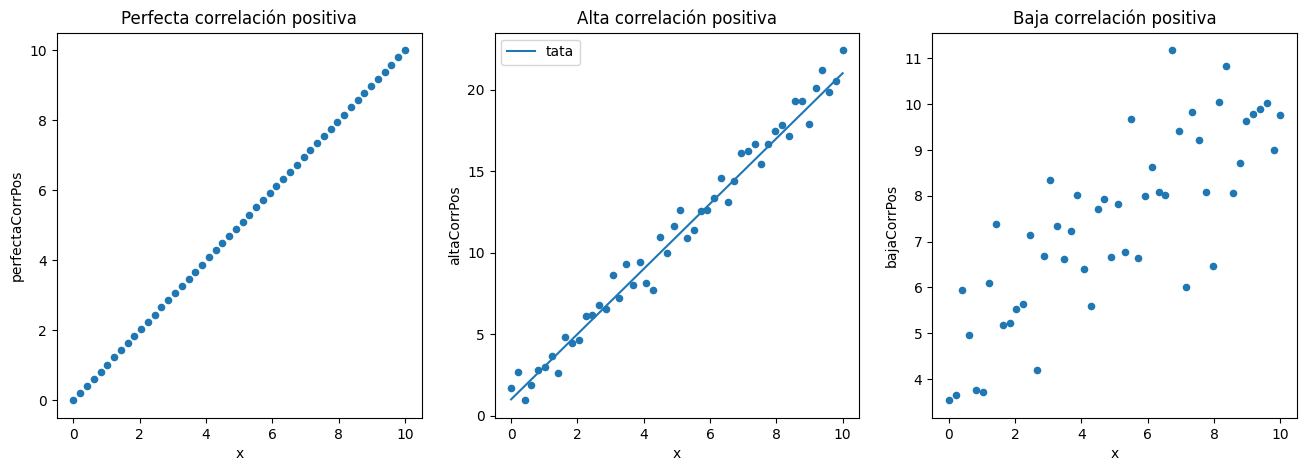

In [50]:
# Graficar los datos utilizando los métodos de trazado de pandas
fig, axs = plt.subplots(1, 3, figsize=(16, 5))

df.plot.scatter(x='x', y='perfectaCorrPos', ax=axs[0], title='Perfecta correlación positiva')
df.plot.scatter(x='x', y='altaCorrPos', ax=axs[1], title='Alta correlación positiva')
df.plot.scatter(x='x', y='bajaCorrPos', ax=axs[2], title='Baja correlación positiva')

tata = 2*x+1
df['tata'] = tata
df.plot(x='x', y='tata', ax=axs[1])

plt.show()


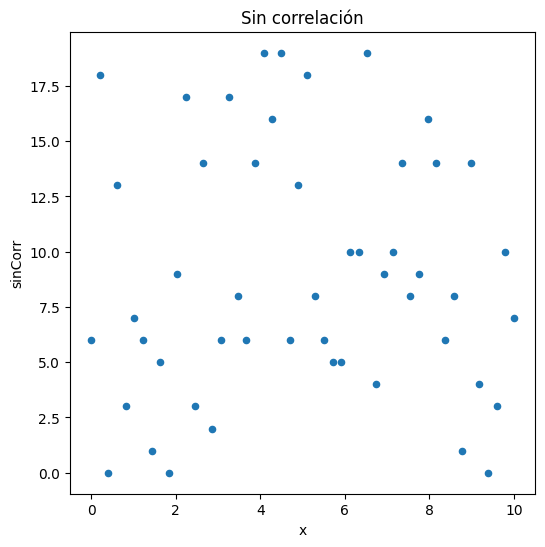

In [51]:
# Graficar los datos utilizando los métodos de trazado de pandas
fig, axs = plt.subplots(figsize=(6, 6))

df.plot.scatter(x='x', y='sinCorr', ax=axs, title='Sin correlación')

plt.show()


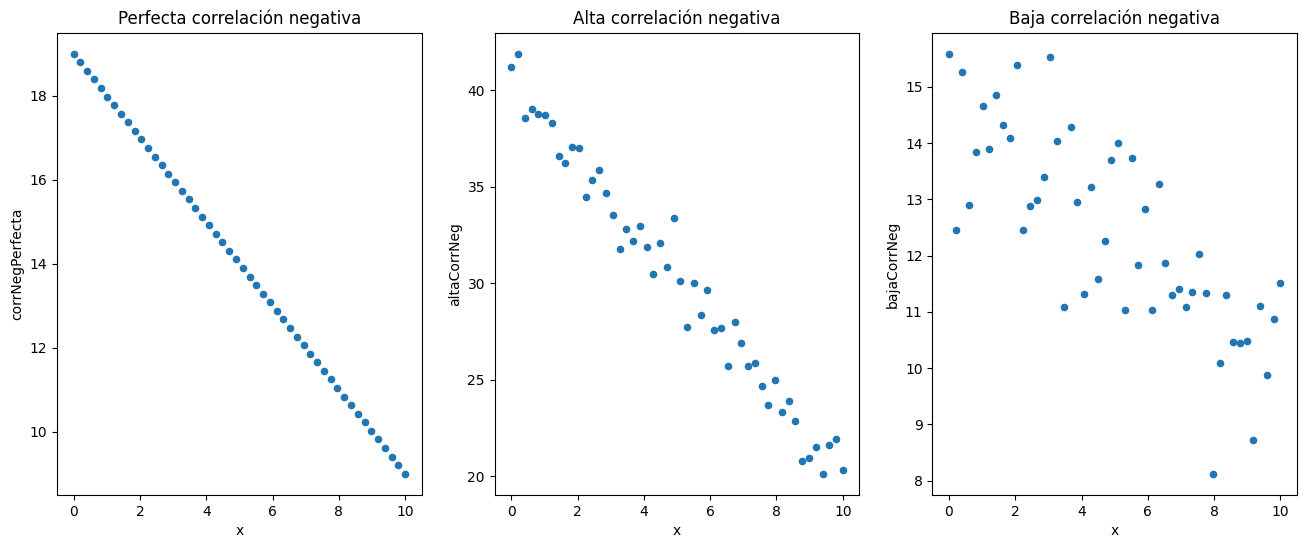

In [52]:
# Graficar los datos utilizando los métodos de trazado de pandas
fig, axs = plt.subplots(1, 3, figsize=(16, 6))

df.plot.scatter(x='x', y='corrNegPerfecta', ax=axs[0], title='Perfecta correlación negativa')
df.plot.scatter(x='x', y='altaCorrNeg', ax=axs[1], title='Alta correlación negativa')
df.plot.scatter(x='x', y='bajaCorrNeg', ax=axs[2], title='Baja correlación negativa')

plt.show()


In [53]:
# Generar datos sintéticos de altura y peso de una muestra de personas
np.random.seed(123)

alturas = np.random.normal(loc=170, scale=10, size=100)
pesos = alturas * np.random.normal(loc=0.75, scale=0.05, size=100)

# Crear un DataFrame de pandas para almacenar los datos
datos_personas = pd.DataFrame({'altura': alturas, 'peso': pesos})

# Generar datos adicionales de edad
np.random.seed(456)

edades = np.random.normal(loc=35, scale=10, size=100)

# Agregar columna al DataFrame existente
datos_personas['edad'] = edades
datos_personas

,altura,peso,edad
0,159.143694,124.466718,28.318715
1,179.973454,117.181725,30.017905
2,172.829785,135.777366,41.185758
3,154.937053,136.331467,40.686922
4,164.213997,122.958302,48.505095
...,...,...,...
95,180.311145,106.103597,41.261997
96,159.154321,117.222780,35.831492
97,156.365285,116.407303,58.226400
98,173.794006,127.380043,57.846717


In [54]:
# Calcular el coeficiente de correlación de Pearson entre dos columnas
corr_coef = datos_personas['altura'].corr(datos_personas['peso'])

# Imprimir el coeficiente de correlación
print("Coeficiente de correlación altura-peso:", corr_coef)


Coeficiente de correlación altura-peso: 0.7060602358658454


In [55]:
# Calcular la matriz de correlación de Pearson
corr_matrix = datos_personas.corr(method='pearson')

# Mostrar la matriz de correlación
print(corr_matrix)


          altura      peso      edad
altura  1.000000  0.706060  0.004472
peso    0.706060  1.000000  0.042198
edad    0.004472  0.042198  1.000000


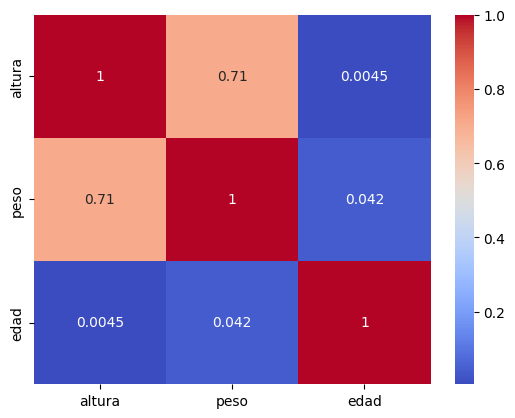

In [56]:
# Crear un mapa de calor de la matriz de correlación
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

# Mostrar el mapa de calor
plt.show()


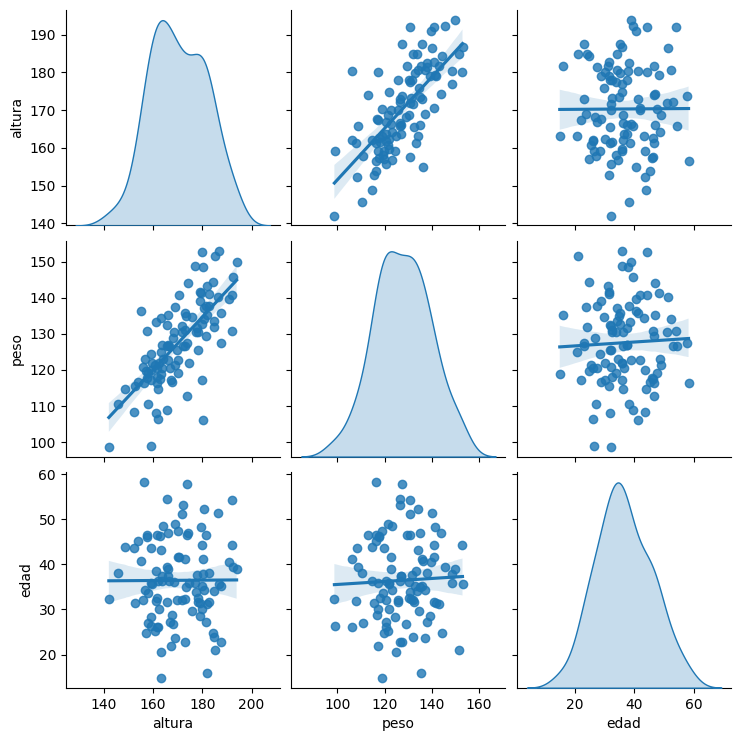

In [57]:
sns.pairplot(datos_personas, kind='reg', diag_kind='kde')

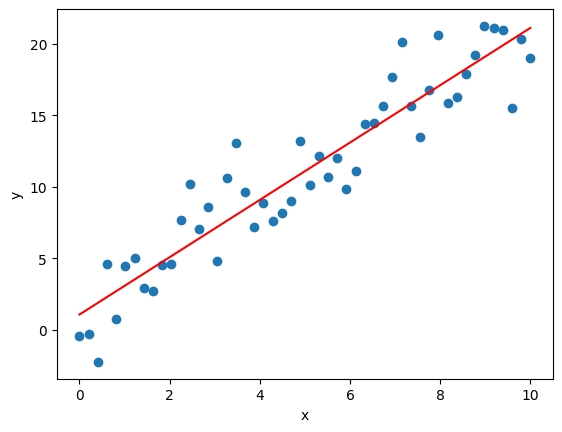

In [58]:
# Generar datos sintéticos con una relación lineal
pendiente = 2
intercepcion = 1
x = np.linspace(0, 10, 50)
y = pendiente * x + intercepcion + np.random.randn(50) * 2

# Graficar los datos
plt.scatter(x, y)
plt.xlabel("x")
plt.ylabel("y")

# Ajustar un modelo de regresión lineal
model = LinearRegression()
model.fit(x.reshape(-1, 1), y) # el -1 es para tomar todos los registros del vector y el 1 es porque es solo una variable

# Calcular las predicciones usando el modelo ajustado
x_pred = np.linspace(0, 10, 100)
y_pred = model.predict(x_pred.reshape(-1, 1))

# Graficar la recta ajustada
plt.plot(x_pred, y_pred, color="red")

# Mostrar la gráfica
plt.show()


In [59]:
# coeficientes del modelo
print("Intercepcion:", model.intercept_)
print("Pendiente:", model.coef_[0])

Intercepcion: 1.0536527219419618
Pendiente: 2.0065952889971697


In [60]:
# Calcular el coeficiente R2 del modelo
r2 = model.score(x.reshape(-1, 1), y)
print(f"El coeficiente R2 del modelo es: {r2:.2f}")


El coeficiente R2 del modelo es: 0.88


In [61]:
import pickle #para guardar el modelo en el disco

In [62]:
with open('modelo.pkl', 'wb') as archivo_salida:
    pickle.dump(model, archivo_salida)

In [63]:
# cargar el modelo
with open('modelo.pkl', 'rb') as archivo_entrada:
    modelo_cargado = pickle.load(archivo_entrada)

In [64]:
modelo_cargado.predict([[5], [10], [15]])

array([11.08662917, 21.11960561, 31.15258206])

In [69]:
import statsmodels.api as sm

In [71]:
model = sm.OLS(y, sm.add_constant(x)).fit()

# Obtenga un resumen detallado del modelo
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.881
Model:                            OLS   Adj. R-squared:                  0.878
Method:                 Least Squares   F-statistic:                     354.4
Date:                Tue, 25 Apr 2023   Prob (F-statistic):           8.37e-24
Time:                        20:38:01   Log-Likelihood:                -109.79
No. Observations:                  50   AIC:                             223.6
Df Residuals:                      48   BIC:                             227.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0537      0.619      1.704      0.0